C:\Users\Julian\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in log
C:\Users\Julian\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: divide by zero encountered in log
C:\Users\Julian\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in log


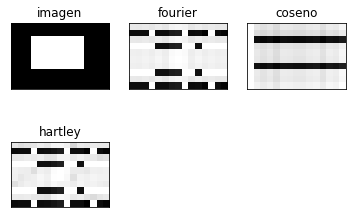

In [13]:
filas=10
columnas=15
a=np.zeros((filas,columnas),np.uint8)
for i in range(a.shape[0]/4,3*a.shape[0]/4):
    for j in range (a.shape[1]/4,3*a.shape[1]/4):
        a[i,j]=255
        
fa=fourierTrans(a)
ca=cosineTrans(a)
ha=hartleyTrans(a)

plt.figure(1)
plt.subplot(231), plt.imshow(a,cmap='gray')
plt.title('imagen'), plt.xticks([]),plt.yticks([])

plt.subplot(232), plt.imshow(np.log(np.abs(fa)),cmap='gray')
plt.title('fourier'), plt.xticks([]),plt.yticks([])

plt.subplot(233), plt.imshow(np.log(np.abs(ca)),cmap='gray')
plt.title('coseno'), plt.xticks([]),plt.yticks([])

plt.subplot(234), plt.imshow(np.log(np.abs(ha)),cmap='gray')
plt.title('hartley'), plt.xticks([]),plt.yticks([])


#plt.subplot(235), plt.imshow(d,cmap='gray')
#plt.title('recuperacion'), plt.xticks([]),plt.yticks([])
plt.show()

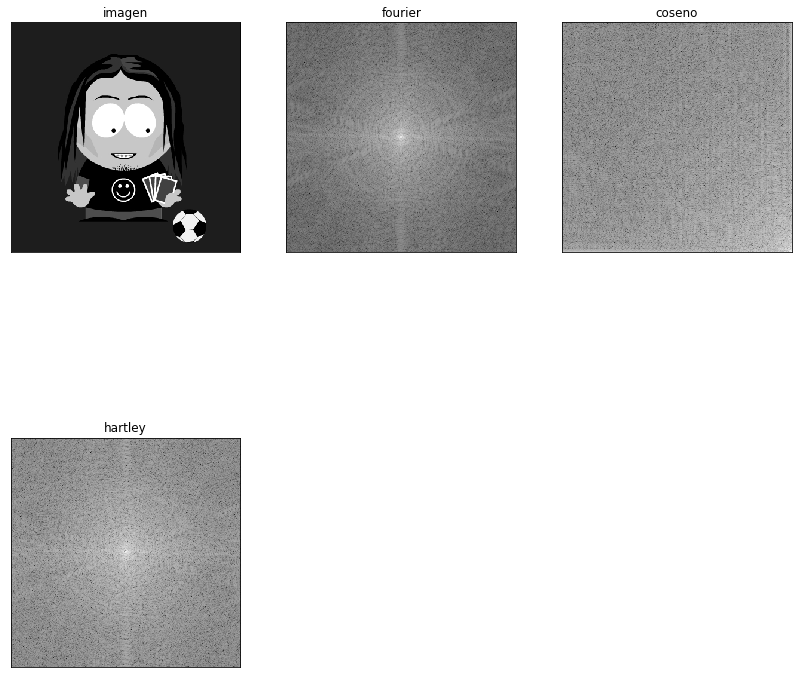

In [14]:
##Inicializacion de la imagen
imagen1 = cv2.imread('Ej/example3.jpg',0)




fi=fourierTrans(imagen1)
ci=cosineTrans(imagen1)
hi=hartleyTrans(imagen1)

plt.figure(1,figsize=(14,14))
plt.subplot(231), plt.imshow(imagen1,cmap='gray')
plt.title('imagen'), plt.xticks([]),plt.yticks([])
plt.subplot(232), plt.imshow(np.log(np.abs(fi)),cmap='gray')
plt.title('fourier'), plt.xticks([]),plt.yticks([])

plt.subplot(233), plt.imshow(np.log(np.abs(ci)),cmap='gray')
plt.title('coseno'), plt.xticks([]),plt.yticks([])

plt.subplot(234), plt.imshow(np.log(np.abs(hi)),cmap='gray')
plt.title('hartley'), plt.xticks([]),plt.yticks([])


plt.show()

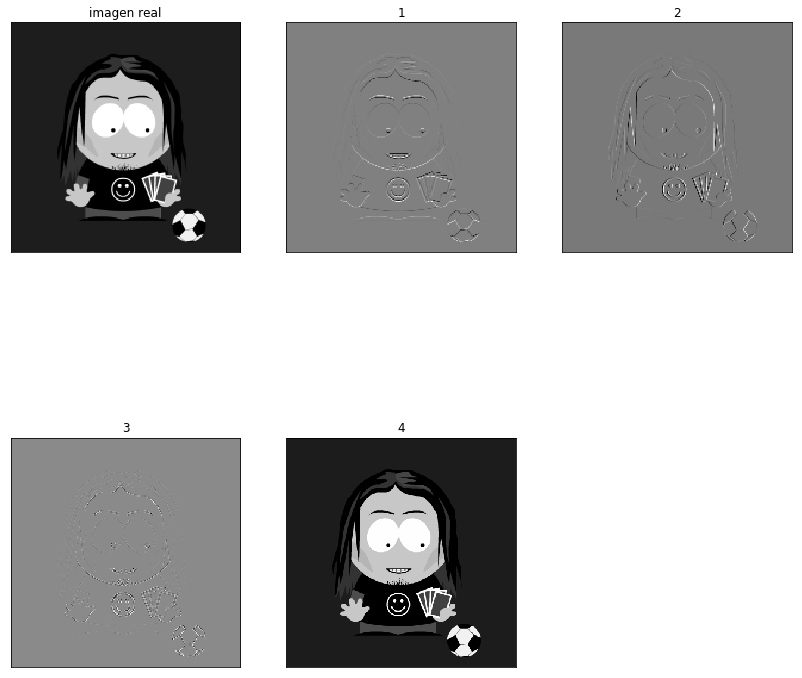

In [20]:
plt.figure(1,figsize=(14,14))


hola1=waveTrans(imagen1,'haar',1)
hola2=waveTransIn(hola1)

plt.subplot(231), plt.imshow(hola1[0],cmap='gray')
plt.title('imagen real'), plt.xticks([]),plt.yticks([])

plt.subplot(232), plt.imshow(hola1[1][0],cmap='gray')
plt.title('1'), plt.xticks([]),plt.yticks([])

plt.subplot(233), plt.imshow(hola1[1][1],cmap='gray')
plt.title('2'), plt.xticks([]),plt.yticks([])


plt.subplot(234), plt.imshow(hola1[1][2],cmap='gray')
plt.title('3'), plt.xticks([]),plt.yticks([])
plt.subplot(235), plt.imshow(hola2,cmap='gray')
plt.title('4'), plt.xticks([]),plt.yticks([])
plt.show()
    

C:\Users\Julian\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log
C:\Users\Julian\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: divide by zero encountered in log
C:\Users\Julian\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: divide by zero encountered in log


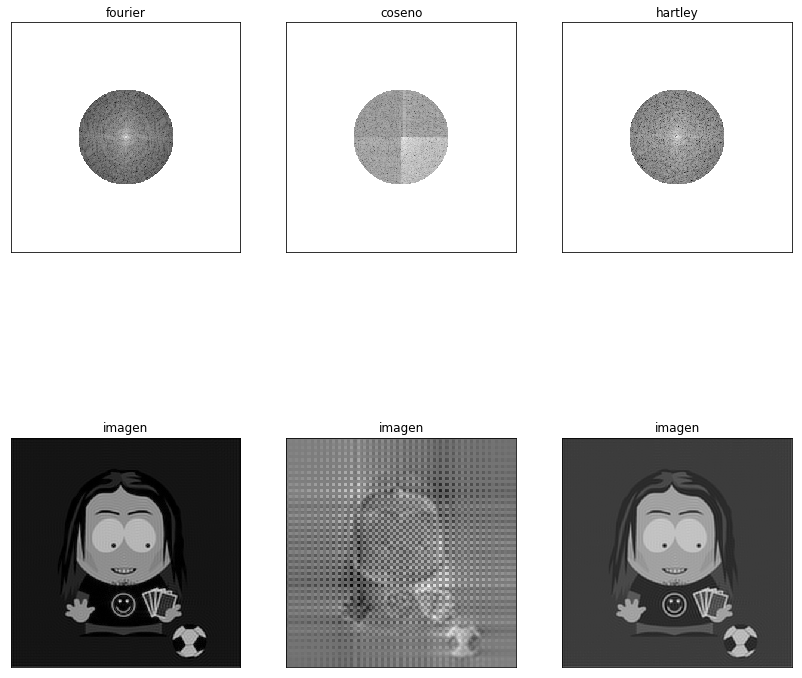

In [24]:
filtro=ideal2d_lp(imagen1.shape,80)
fi=fourierTrans(imagen1)*filtro
ci=acosineTrans(imagen1)*filtro
hi=hartleyTrans(imagen1)*filtro

ifi=fourierTransIn(fi)
ici=acosineTransIn(ci)
ihi=hartleyTransIn(hi)

plt.figure(1,figsize=(14,14))

plt.subplot(231), plt.imshow(np.log(np.abs(fi)),cmap='gray')
plt.title('fourier'), plt.xticks([]),plt.yticks([])

plt.subplot(232), plt.imshow(np.log(np.abs(ci)),cmap='gray')
plt.title('coseno'), plt.xticks([]),plt.yticks([])

plt.subplot(233), plt.imshow(np.log(np.abs(hi)),cmap='gray')
plt.title('hartley'), plt.xticks([]),plt.yticks([])

plt.subplot(234), plt.imshow(np.abs(ifi),cmap='gray')
plt.title('imagen'), plt.xticks([]),plt.yticks([])

plt.subplot(235), plt.imshow(ici,cmap='gray')
plt.title('imagen'), plt.xticks([]),plt.yticks([])

plt.subplot(236), plt.imshow(ihi,cmap='gray')
plt.title('imagen'), plt.xticks([]),plt.yticks([])


plt.show()

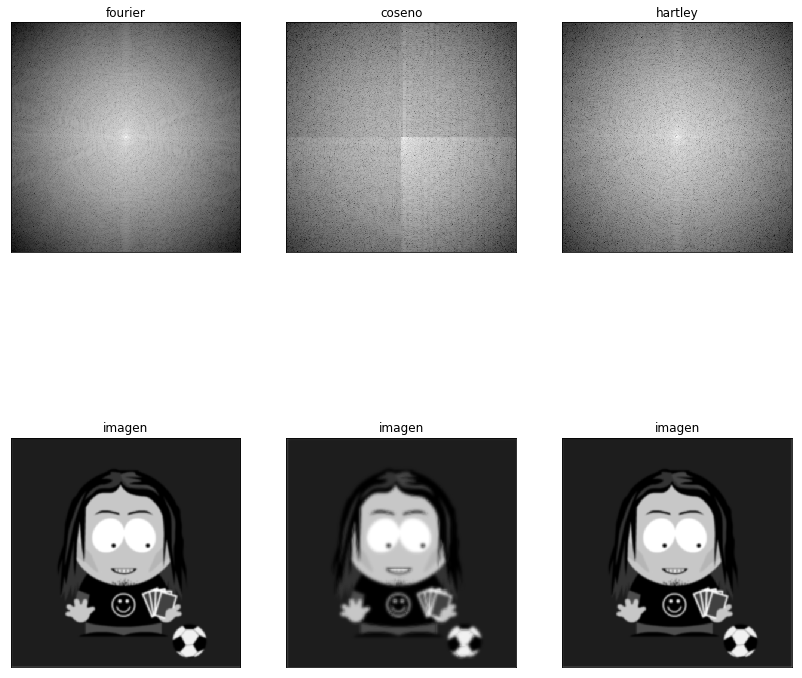

In [31]:
filtro=gauss2d_lp(imagen1.shape,50)
fi=fourierTrans(imagen1)*filtro
ci=acosineTrans(imagen1)*filtro
hi=hartleyTrans(imagen1)*filtro

ifi=fourierTransIn(fi)
ici=acosineTransIn(ci)
ihi=hartleyTransIn(hi)

plt.figure(1,figsize=(14,14))

plt.subplot(231), plt.imshow(np.log(np.abs(fi)),cmap='gray')
plt.title('fourier'), plt.xticks([]),plt.yticks([])

plt.subplot(232), plt.imshow(np.log(np.abs(ci)),cmap='gray')
plt.title('coseno'), plt.xticks([]),plt.yticks([])

plt.subplot(233), plt.imshow(np.log(np.abs(hi)),cmap='gray')
plt.title('hartley'), plt.xticks([]),plt.yticks([])

plt.subplot(234), plt.imshow(np.abs(ifi),cmap='gray')
plt.title('imagen'), plt.xticks([]),plt.yticks([])

plt.subplot(235), plt.imshow(ici,cmap='gray')
plt.title('imagen'), plt.xticks([]),plt.yticks([])

plt.subplot(236), plt.imshow(ihi,cmap='gray')
plt.title('imagen'), plt.xticks([]),plt.yticks([])


plt.show()

In [1]:
import cv2
from IPython.display import Image
import numpy as np
import pywt
from matplotlib import pyplot as plt
def ideal2d_lp(shape,limit,pxd=1):
    pxd = float(pxd)
    h,w = shape
    x= np.linspace(-0.5,0.5,w)*w/pxd
    y= np.linspace(-0.5,0.5,h)*h/pxd
    radius=np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    filt=np.ones(shape)
    filt[radius>limit] =0
    return filt

def gauss2d_lp(shape,limit,pxd=1):
    pxd = float(pxd)
    h,w = shape
    x= np.linspace(-0.5,0.5,w)*w/pxd
    y= np.linspace(-0.5,0.5,h)*h/pxd
    radius=np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])    
    pot= - 0.5*(radius**2)/(limit**2)
    filt=np.exp(pot)
    return filt

def shiftCenter(img):
    h, w = img.shape[:2]
    centered=np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            centered[i][j]=img[i][j] * (-1)**(i+j)
    return centered
def fourierTrans(img):
    trans=np.fft.fft2(img)
    shift=np.fft.fftshift(trans)
    return shift
def fourierTransIn(shift):
    trans=np.fft.ifftshift(shift)
    img=np.fft.ifft2(trans)    
    return img
def hartleyTrans(img):
    trans=np.fft.fft2(img)
    fshift= np.fft.fftshift(trans)    
    return fshift.real - fshift.imag  
def hartleyTransIn(shift):
    trans= np.fft.ifftshift(shift)
    img=np.fft.ifft2(trans)   
    return img.real + img.imag
def cosineTrans(img):
    shift=shiftCenter(img)
    #img1 = np.float32(shift)/255.0  
    trans = cv2.dct(np.float32(shift))           
    return trans
def cosineTransIn(trans):
    shift=cv2.idct(trans)
    img=shiftCenter(shift)
    return img
def acosineTrans(img):
    f = cv2.dct(img.astype('float32'))
    fshift = np.fft.fftshift(f)
    return fshift
def acosineTransIn(shift):
    trans=np.fft.ifftshift(shift)    
    return cv2.idct(np.float32(trans))
def waveTrans(img, mode='haar', level=1):
    img =  np.float32(img)   
    #img /= 255;
    coeffs=pywt.wavedec2(img, mode, level=level)
    #coeffs_H=list(coeffs)
    return coeffs
def waveTransIn(coeffs, mode='haar'):
    img=pywt.waverec2(coeffs, mode);
    #img *= 255;
    return  img
def softCoeff(hola1, tr):
    for i in range(len(hola1)-1):
        for j in range(3):
            for k in range (len(hola1[i+1][j])):
                for l in range (len(hola1[i+1][j])):
                    hola1[i+1][j][k][l]= sign(hola1[i+1][j][k][l]) * (abs(hola1[i+1][j][k][l])-tr)
    for i in range (len(hola1[0])):
        for j in range (len(hola1[0])):
            hola1[0][i][j]= sign(hola1[0][i][j]) * (abs(hola1[0][i][j])-tr)

    return hola1

def hardCoeff(hola1, tr):
    for i in range(len(hola1)-1):
        for j in range(3):
            for k in range (len(hola1[i+1][j])):
                for l in range (len(hola1[i+1][j])):
                    if(abs(hola1[i+1][j][k][l])<tr):
                        hola1[i+1][j][k][l]= 0
    for i in range (len(hola1[0])):
        for j in range (len(hola1[0])):
            if(abs(hola1[0][i][j])<tr):
                        hola1[0][i][j]= 0

    return hola1

def softWave(hola1, tr):
    for i in range(len(hola1)):
        hola1[i]=pywt.threshold(hola1[i], tr, 'soft')
    return hola1
def hardWave(hola1, tr):
    for i in range(len(hola1)):
        hola1[i]=pywt.threshold(hola1[i], tr, 'hard')
    return hola1

    return hola1
def sign(num):
    if(num>0):
        return 1
    elif(num<0):
        return -1
    else:
        return 0;
    
    
    
    

148225

128
128


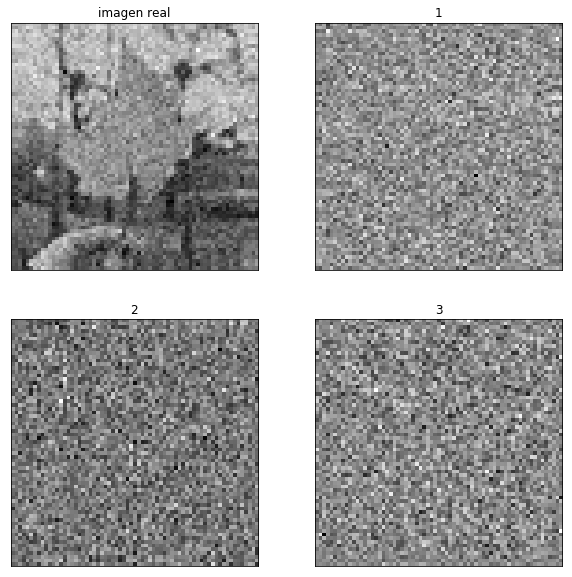

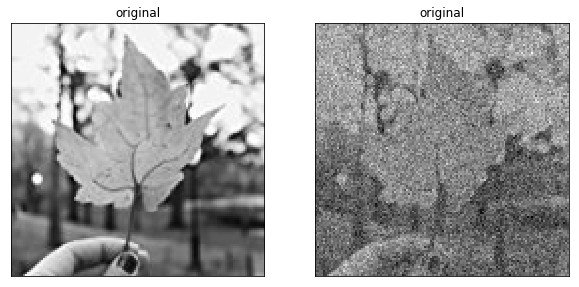

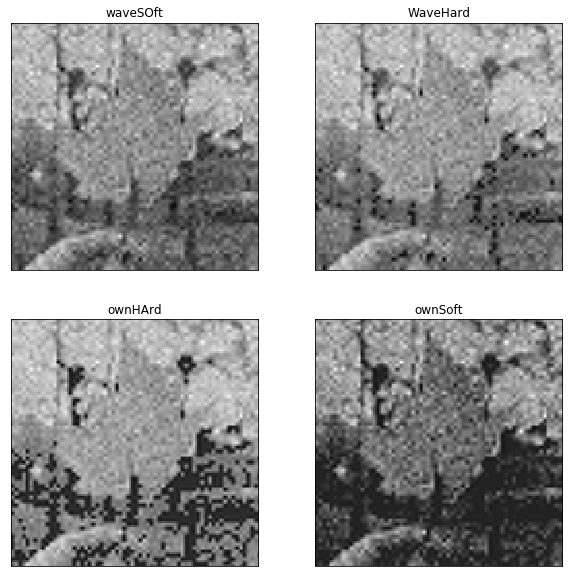

In [154]:
import math
imagen1 = cv2.imread('Ej/test.jpg',0)
size=len(imagen1)
gaussian_noise = np.zeros((size, size))
Sigma=50;
mode="sym4"
Noised=imagen1 + cv2.randn(gaussian_noise,128,Sigma);
rig=Sigma*thselect2D(cv2.randn(gaussian_noise,0,1),'rigrsure')
#Noised=np.uint8(Noised)
Uni=Sigma*(math.sqrt(2*np.log2(size*size)))


plt.figure(1,figsize=(10,10))
hola1=waveTrans(Noised,mode,1)




plt.subplot(221), plt.imshow(hola1[0],cmap='gray')
plt.title('imagen real'), plt.xticks([]),plt.yticks([])

plt.subplot(222), plt.imshow(hola1[1][0],cmap='gray')
plt.title('1'), plt.xticks([]),plt.yticks([])

plt.subplot(223), plt.imshow(hola1[1][1],cmap='gray')
plt.title('2'), plt.xticks([]),plt.yticks([])


plt.subplot(224), plt.imshow(hola1[1][2],cmap='gray')
plt.title('3'), plt.xticks([]),plt.yticks([])

hola2=waveTransIn(softWave(hola1,rig),mode)
hola3=waveTransIn(hardWave(hola1,rig),mode)
hola4=waveTransIn(hardCoeff(hola1,Uni),mode)
hola5=waveTransIn(softCoeff(hola1,Uni),mode)
print len(hola2)
print len(hola3)

plt.figure(2,figsize=(10,10))
plt.subplot(121), plt.imshow(imagen1,cmap='gray')
plt.title('original'), plt.xticks([]),plt.yticks([])

plt.subplot(122), plt.imshow(Noised,cmap='gray')
plt.title('original'), plt.xticks([]),plt.yticks([])
plt.figure(3,figsize=(10,10))
plt.subplot(221), plt.imshow(hola2,cmap='gray')
plt.title('waveSOft'), plt.xticks([]),plt.yticks([])
plt.subplot(222), plt.imshow(hola3,cmap='gray')
plt.title('WaveHard'), plt.xticks([]),plt.yticks([])
plt.subplot(223), plt.imshow(hola4,cmap='gray')
plt.title('ownHArd'), plt.xticks([]),plt.yticks([])
plt.subplot(224), plt.imshow(hola5,cmap='gray')
plt.title('ownSoft'), plt.xticks([]),plt.yticks([])

plt.show()



C:\Anaconda2\lib\site-packages\pyyawt\dwt.py:471: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif (np.any(mode == modes)):


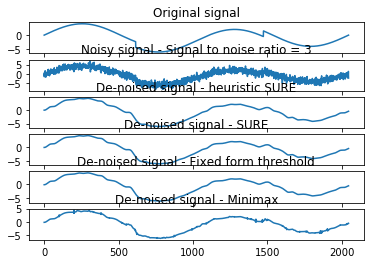

In [20]:
import pyyawt
import pyyawt
import matplotlib.pyplot as pyplot

snr = 3

# generate test signal
[xref,x] = pyyawt.wnoise(3,11,snr)

level = 5
xd,cxd,lxd = pyyawt.wden(x,'heursure','s','one',level,'sym8')

fig = pyplot.figure()
ax1 = fig.add_subplot(611)
pyplot.plot(xref)
pyplot.title('Original signal')
ax2 = fig.add_subplot(612)
pyplot.plot(x)
pyplot.title('Noisy signal - Signal to noise ratio = '+str(snr))
ax1 = fig.add_subplot(613)
pyplot.plot(xd)
pyplot.title('De-noised signal - heuristic SURE')

xd,cxd,lxd = pyyawt.wden(x,'heursure','s','one',level,'sym8')

ax1 = fig.add_subplot(614)
pyplot.plot(xd)
pyplot.title('De-noised signal - SURE')

xd,cxd,lxd = pyyawt.wden(x,'sqtwolog','s','sln',level,'sym8')

ax1 = fig.add_subplot(615)
pyplot.plot(xd)
pyplot.title('De-noised signal - Fixed form threshold')

xd,cxd,lxd = pyyawt.wden(x,'minimaxi','s','sln',level,'sym8')

ax1 = fig.add_subplot(616)
pyplot.plot(xd)
pyplot.title('De-noised signal - Minimax')

pyplot.show()

In [141]:
#print np.sqrt(2*np.log(15*15))

def thselect2D(data,mode):
    return pyyawt.thselect(list(np.array(data).reshape(-1,)),mode)
x= np.zeros((size, size))
x1=np.zeros((size, size))
    
    
    
x1=np.random.randn(size*size).tolist()
cv2.randn(x,0,1);
print thselect2D(x,'rigrsure')
print thselect2D(x1,'rigrsure')

4.30227947235
3.43573774784


In [ ]:
levels=1
n=15*15
lamb=[]
NoBands=3*levels+1
for i in range(1, NoBands-1):
    lambd.arange(0, np.sqrt(2*np.log(n)), 0.1)
    sure = np.zeros(1,len(lambd))
    for j in range(1, len(lambd)):
        t1=1
        t2=
    